<b>Principal Component Analysis </b>
Mouse | Gene1 | Gene2 | Gene3 | Gene4
--|--| --| --| --
1 | 10 | 6 | 1.2 | 5
2 | 11 | 4 | 9 | 7
3 | 8 | 5 | 10 | 6
4 | 3 | 3 | 2.5 | 2
5 | 1 | 2.8 | 1.3 | 4
6 | 2 | 1 | 2 | 7

If we only measure Gene1 how do I separate the mice?

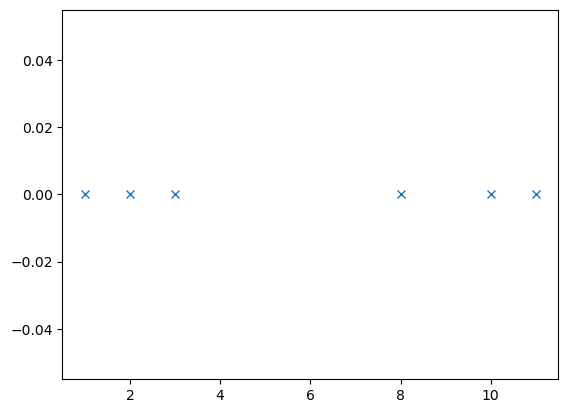

In [2]:
import numpy as np
from matplotlib import pyplot as plt
gene1 = [10, 11, 8, 3, 1, 2]
val = 0
plt.plot(gene1, np.zeros_like(gene1), 'x')

Mice 1, 2, 3 are more similar to eacho ther than they are to mice 4, 5 and 6. Lets measure two genes.

In [3]:
gene2 = [6, 4, 5, 3, 2.8, 1]

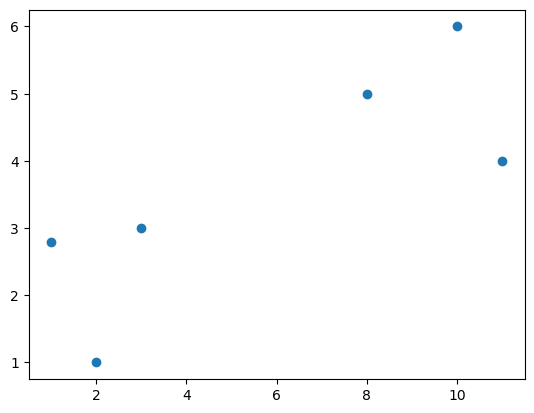

In [4]:
plt.scatter(gene1, gene2)

- PCA can tell is which gene or variable or combination of variables os the most valuable for clustering
- To understand PCA we will a dataset with the first two genes.

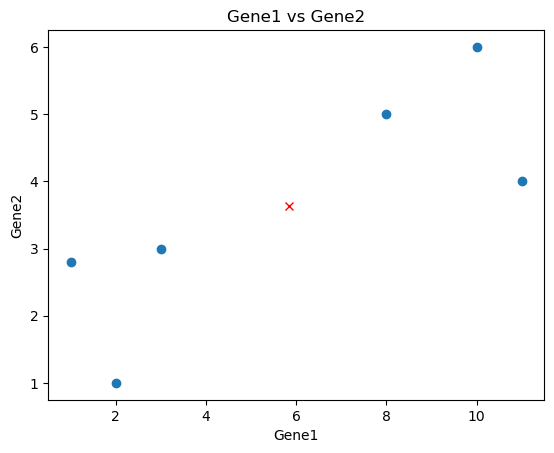

In [5]:
plt.scatter(gene1, gene2)
plt.title("Gene1 vs Gene2")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
gene1average = np.average(gene1)
gene2average = np.average(gene2)
plt.plot(gene1average, gene2average, 'rx')

- We will shift the data so that the centre is at the origin
- We do this by subtracting the average from every point

In [6]:
gene1 = gene1 - gene1average
gene2 = gene2 - gene2average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


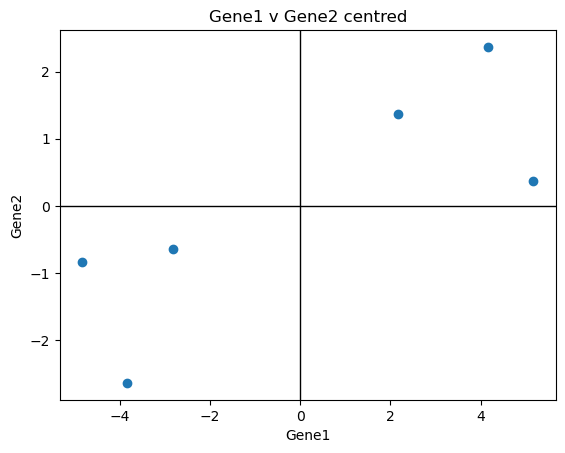

In [7]:
plt.scatter(gene1, gene2)
plt.title("Gene1 v Gene2 centred")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

- Shifting the data did not change how the points are positioned relative to each other
- Now that the data centred at the origin we can fit a line to it
- Start with a random line through the origin and rotate until it fits as good as possible
- We need to talk about how PCA decides whether the line is a good fit or not
- Consider a random starting line through the origin
- To quantify how good our line fits the data, PCA will project the data onto the line and then either measure the distances from the data to the line and try to minimise those distances or
- It can try to find the line that maximises the distances from the projected points to the origin
- $a^2 = b^2 + c^2$ since $a$ is fixed as $b$ gets smaller $c$ must get bigger
- PCA can either minimise $b$ or maximise $c$
- Intuitively it is more obvious to minimise $b$... but it is easier to calculate c, the distance from the projected point to the origin, so PCA finds the best line by maximising the sum of squared distances from the projected points to the origin
- Rotate the line to find SS(distances)
- This line is called Principal Component 1 or PC1 for short

In [8]:
from scipy import stats
slope, intercept, _, _ ,_ = stats.linregress(gene1, gene2)
print(slope)
print(intercept)

0.32302284710017576
-1.6964884226316686e-16


- PC1 has slope of 0.323. In otherwords for every 3 units we go along gene1 we go up one unit along the gene2 axis
- This means that the data is mostly spread out along the gene1 axis and only a little spread out along the gene2 axis
- To make PC1 we take 3 parts gene1 and 1 part gene2
- The ratio of gene2 to gene2 tells you that gene1 is more important when it comes to decribing how spread out data is
- PC1 is linear combation of gene1 and gene2
- When you do PCA with Singular Value Decomposition (SVD), the recipe for PC1 is scaled so that its length is one. We need to divide by $\sqrt(10)$
- PC1 = $\frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$
- The unit vector os called the Singular Vector or the eigenvector of PC1
- The proportions of each gene are called "Loading scores"
- PCA calls the average of SS(distances) for the best fit line the eigenvalue for PC1
- $\frac{SS(distances for PC1)}{n-1}$ = Eigenvalue for PC1
- $\sqrt{SS(distances for PC1)}$ = singular value for PC1
- Because this example is 2D, PC2 is the line through the origin that is perpendicular to PC1
- PC2 = -1gene1 + 3gene2
- Scaling to a unit vector $PC2 = \frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt{10}}gene2$
- For PC2 gene2 is 3 times more important than gene1
- To draw the final PCA plot rotate everything so that PC1 is horizontal. Then we can use the projected points to see where the sample points are in the PCA plot
- Eigenvalues are measures of variation
- For the sake of this example suppose the variation explained by PC1 ois 15 and the variation for PC2 is 3
- Total variation is 18
- This means that PC1 accounts for 15/18 = 83% of the variation around the PCs
- A scree plot is a graphical of what percentage of variance each PC explains

<b>PCA with 3 variables</b>
- Centre the data (want data with mean 0 and standard deviation 1)
- Find the line of best fit that goes through the origin - PC1
- PC1 = 0.62gene1 + 0.15gene2+0.77gene3
- PC2 is next best fitting line that goes through the origin and is at right angles to PC1
- PC2 = 0.77gene1 + 0.62gene2+0.15gene3
- PC3 is the best fitting line through the origin that is at right angles to both PC1 and PC2
- In theory there is one PC per variable but in practice, the number of PCs is either the number of variables or the number of samples, whichever is smaller
- Once we have all of the PCs we can use the eigenvalues to determine the proportion of variation that each PC accounts for
- For example PC1 account for 79%, PC2 15%, PC3 for 6%

In [9]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [10]:
genes = ['gene'+str(i) for i in range(1, 101)]
wt = ['wt'+str(i) for i in range(1, 6)]
ko = ['ko'+str(i) for i in range(1, 6)]

In [12]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [14]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [16]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,286,289,271,269,269,448,450,446,437,414
gene2,814,812,806,777,785,254,257,255,256,243
gene3,336,355,359,323,342,779,811,787,804,821
gene4,450,449,435,451,425,992,939,966,968,969
gene5,744,700,731,727,763,514,516,487,505,498


In [17]:
print(data.shape)

(100, 10)


In [27]:
scaled_data = preprocessing.scale(data.T)

In [28]:
scaled_data

array([[-8.78130319e-01,  1.05481123e+00, -1.02860655e+00,
        -9.68144475e-01,  1.08487364e+00,  1.04222454e+00,
        -1.29962048e+00, -1.02214609e+00, -1.00522430e+00,
        -9.45688802e-01,  1.08313201e+00,  9.80475450e-01,
         9.89426853e-01, -3.48004693e-01, -9.96575045e-01,
        -8.30489862e-01, -1.04895857e+00, -9.32757712e-01,
         6.02291044e-01, -9.74039778e-01, -1.04210079e+00,
         6.85852739e-01, -1.04433603e+00, -1.22071259e+00,
         1.02853066e+00,  9.14620375e-01, -9.05988947e-01,
         9.89619744e-01, -1.06286784e+00,  1.09641024e+00,
         8.18810003e-01,  9.13997989e-01,  9.44583938e-01,
         5.21354324e-01, -1.00294697e+00, -1.12870297e+00,
         1.02518517e+00,  9.64357851e-01,  8.23278399e-01,
         1.14301484e+00, -1.02578493e+00,  9.38133718e-01,
         9.04181329e-01, -9.85679290e-01, -9.94990980e-01,
         1.21709294e+00,  1.06154687e+00, -4.42504828e-01,
         7.94943275e-01, -1.09916471e+00, -7.78244787e-0

In [29]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([87.1,  3.1,  3. ,  1.8,  1.5,  1.4,  0.9,  0.7,  0.5,  0. ])

In [30]:
pca_data

array([[ 9.50949471e+00,  2.70741045e+00, -2.28694414e-01,
        -1.36409864e+00,  2.51001667e-01, -1.08763248e+00,
         7.53055664e-01,  1.43544774e+00,  2.95909246e-01,
         8.88178420e-16],
       [ 9.41793308e+00,  3.71584501e-01, -2.44993357e+00,
         7.73162374e-02, -1.70596853e+00,  3.36810516e-03,
         8.87531373e-01, -1.26326298e+00, -6.63905053e-01,
         1.37390099e-15],
       [ 9.55342762e+00, -3.50236985e-01,  2.63670995e+00,
        -5.22556260e-01, -7.18349945e-01,  2.63292220e+00,
        -1.30583338e-01,  8.29389158e-02,  2.50682377e-01,
         1.83186799e-15],
       [ 8.76120936e+00, -1.62498524e+00, -1.28800420e-01,
         2.69301781e+00, -1.08162774e-01, -1.01632009e+00,
        -3.07576440e-01,  1.76803415e-01,  1.00950987e+00,
         2.22044605e-15],
       [ 9.39987860e+00, -1.10202393e+00,  1.71173481e-01,
        -7.03770879e-01,  2.32010444e+00, -5.58513253e-01,
        -1.19327597e+00, -4.29698009e-01, -8.83095143e-01,
         2.

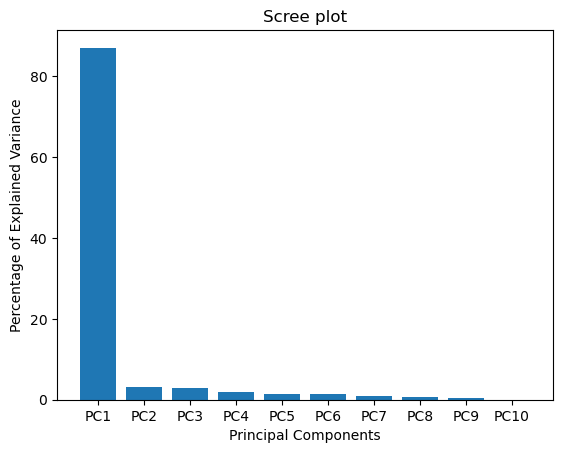

In [34]:
labels=['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree plot")
plt.show()

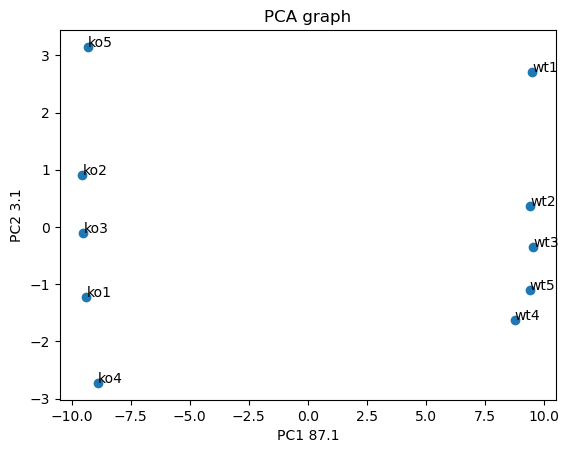

In [36]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 {per_var[0]}')
plt.ylabel(f'PC2 {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()


In [43]:
pd.set_option('display.max_rows', 1000)
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

gene1     -0.106093
gene2      0.107095
gene3     -0.106818
gene4     -0.106963
gene5      0.106063
gene6      0.106815
gene7     -0.103021
gene8     -0.106838
gene9     -0.105255
gene10    -0.106806
gene11     0.106762
gene12     0.107023
gene13     0.105576
gene14    -0.010950
gene15    -0.106948
gene16    -0.100560
gene17    -0.106900
gene18    -0.107018
gene19     0.100348
gene20    -0.106770
gene21    -0.107013
gene22     0.104388
gene23    -0.107111
gene24    -0.103974
gene25     0.107118
gene26     0.107046
gene27     0.014352
gene28     0.105485
gene29    -0.106309
gene30     0.105808
gene31     0.106272
gene32     0.106929
gene33     0.106825
gene34     0.090635
gene35    -0.106849
gene36    -0.104509
gene37     0.107031
gene38     0.106918
gene39     0.104664
gene40     0.106839
gene41    -0.106816
gene42     0.106550
gene43     0.105735
gene44    -0.107052
gene45    -0.106702
gene46     0.100258
gene47     0.106902
gene48    -0.093836
gene49     0.106401
gene50    -0.106222
